## Observations and Insights 

Three observations which can be made from analyzing this data set include:
1. There appears to be a positive correlation between mouse weight and tumor volume.
2. From the data set, Ramicane appears to be the most promising drug regimen for these mice in terms of causing the slowest rate of tumor growth.
3. The linear regression model for the Capomulin drug regimen is able to get close to or capture a good amount of the data points on the scatter plot and consequently, the correlation coefficient value is fairly high. This increases my confidence in using this generated linear regression formula to make future predictions of tumor volumes based on the weight of the mouse or calculating the estimated weight of the mouse based on provided tumor volume.

In [1354]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
combined_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [1355]:
# Checking the number of mice.
numberOfMice = combined_mouse_df["Mouse ID"].nunique()
print(f"The number of mice in the study: {numberOfMice}")

The number of mice in the study: 249


In [1356]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = combined_mouse_df.groupby(["Mouse ID", "Timepoint"])

#if the count of Timepoint is greater than 1 then there must be a duplicate entry for this Mouse ID
duplicateMiceIDs = duplicateMice["Timepoint"].count().loc[duplicateMice["Timepoint"].count() > 1, :] 

#Mouse ID is the index at location 0 of this Series; using the leftmost statement returns a tuple - look at index 0 of the tuple for the actual value of Mouse ID
duplicateMouseIDResult = duplicateMiceIDs.index[0][0]
print(f"The single duplicate Mouse ID: {duplicateMouseIDResult}")

The single duplicate Mouse ID: g989


In [1357]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#get names of indexes for when Mouse ID has the value equal to the duplicate Mouse ID found earlier
indexName = combined_mouse_df[combined_mouse_df['Mouse ID'] == duplicateMouseIDResult].index
#delete the row index from the data frame
clean_mouse_df = combined_mouse_df.drop(indexName)

In [1358]:
# Checking the number of mice in the clean DataFrame.
mouseCount = combined_mouse_df["Mouse ID"].nunique()
cleanMouseCount = clean_mouse_df["Mouse ID"].nunique()
print(f"Number of mice before cleaning the data: {mouseCount}")
print(f"Number of mice after cleaning the data: {cleanMouseCount}")

Number of mice before cleaning the data: 249
Number of mice after cleaning the data: 248


## Summary Statistics

In [1359]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_regimen_df = clean_mouse_df.groupby("Drug Regimen")

drugMeans = drug_regimen_df["Tumor Volume (mm3)"].mean()
drugMedians = drug_regimen_df["Tumor Volume (mm3)"].median()
drugVariance = drug_regimen_df["Tumor Volume (mm3)"].var()
drugStandardDeviation = drug_regimen_df["Tumor Volume (mm3)"].std()
drugStandardErrorOfMean = drug_regimen_df["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
drugNames = list(drug_regimen_df["Drug Regimen"].count().index) #get the drug names from the index; convert the names of the drugs to a list
drugSummary_df = pd.DataFrame() #create a new data frame from scratch
drugSummary_df["Drug"] = drugNames #assign the list to the "Drug" column of the data frame
drugSummary_df["Mean"] = list(drugMeans) #convert the Pandas Series variables to lists to more intuitively assign values
drugSummary_df["Median"] = list(drugMedians)
drugSummary_df["Variance"] = list(drugVariance)
drugSummary_df["Standard Dev"] = list(drugStandardDeviation)
drugSummary_df["SEM"] = list(drugStandardErrorOfMean)

drugSummary_df.style.hide_index() #print data frame without the index numbers

Drug,Mean,Median,Variance,Standard Dev,SEM
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [1360]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_df["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Dev', 'sem': 'SEM'})

,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

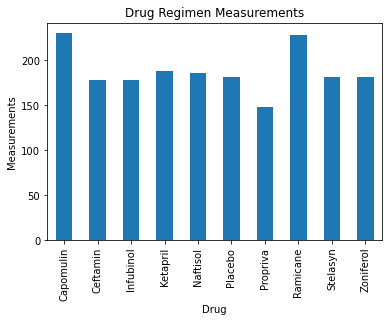

In [1361]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_regimen_df["Tumor Volume (mm3)"].count().plot.bar()
plt.title("Drug Regimen Measurements")
plt.xlabel("Drug")
plt.ylabel("Measurements")
plt.show()

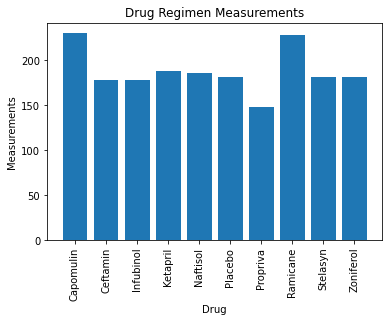

In [1362]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
tumorVolumes = list(drug_regimen_df["Tumor Volume (mm3)"].count()) #converting to list for easier access to values
drugNames = list(drug_regimen_df["Drug Regimen"].count().index) #get the drug names from the index; convert the names of the drugs to a list
x_axis = drugNames

plt.bar(x_axis, tumorVolumes, alpha=1, align="center")
plt.xticks(rotation=90) #rotate the names of the drugs 90 degrees so the text does not run together
plt.title("Drug Regimen Measurements")
plt.xlabel("Drug")
plt.ylabel("Measurements")
plt.show()

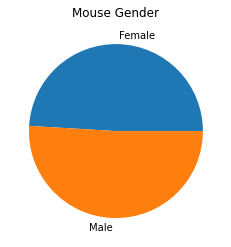

In [1363]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_df.groupby("Sex")["Mouse ID"].count().plot.pie(label="") #blank label to remove the "Mouse ID" name from the chart
plt.title("Mouse Gender")
plt.show()

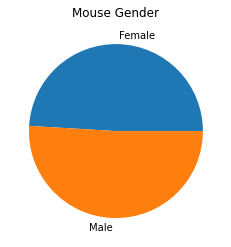

In [1364]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_gender_series = clean_mouse_df.groupby("Sex")["Mouse ID"].count() #creating a series for the count of each gender of mouse
genderType = list(mouse_gender_series.index) #get the gender name from the index; convert the gender name data to a list

plt.pie(mouse_gender_series, labels = genderType)
plt.title("Mouse Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [1365]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouseIDGroupBy = clean_mouse_df.groupby("Mouse ID")["Timepoint"].max() #getting the maximum timepoint for each mouse

mouse_timepoint_max_df = pd.DataFrame(mouseIDGroupBy)
mouse_timepoint_max_df = mouse_timepoint_max_df.rename(columns={'Timepoint': 'Max Timepoint'})
mouse_timepoint_max_df = mouse_timepoint_max_df.reset_index() #turn the Mouse ID index into a column so I can perform the following data frame merge

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_merged_timepoint_df = pd.merge(clean_mouse_df, mouse_timepoint_max_df) #merge the two data frames on the Mouse ID column

#showing only rows when the Timepoint is equal to the Max Timepoint on the merged data frame
max_timepoint_df = mouse_merged_timepoint_df[mouse_merged_timepoint_df['Timepoint'] == mouse_merged_timepoint_df['Max Timepoint']]
max_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Max Timepoint
9,b128,45,38.982878,2,Capomulin,Female,9,22,45
10,f932,0,45.000000,0,Ketapril,Male,15,29,0
18,g107,35,71.905117,0,Ketapril,Female,2,29,35
21,a457,10,49.783419,0,Ketapril,Female,11,30,10
30,c819,40,62.175705,1,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1844,t565,45,34.455298,0,Capomulin,Female,20,17,45
1854,i557,45,47.685963,1,Capomulin,Female,1,24,45
1864,m957,45,33.329098,1,Capomulin,Female,3,19,45
1869,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [1366]:
# Put treatments into a list for for loop (and later for plot labels)
drugTreatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolume = []

for drug in drugTreatments:
    #if the drug is one of the drugs I'm looking for then add it to the data frame for this iteration of the loop
    tumor_volume_df = max_timepoint_df[max_timepoint_df['Drug Regimen'] == drug]
    #append tumor volume data to the list without overwriting data from the previous iteration of the loop
    tumorVolume += (tumor_volume_df["Tumor Volume (mm3)"].tolist())    

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = pd.DataFrame(tumorVolume[0:25])
ramicane_df = pd.DataFrame(tumorVolume[25:50])
infubinol_df = pd.DataFrame(tumorVolume[50:75])
ceftamin_df = pd.DataFrame(tumorVolume[75:100])

capomulinQuartiles = capomulin_df[0].quantile([.25,.5,.75])
capomulinLowerq = capomulinQuartiles[0.25]
capomulinUpperq = capomulinQuartiles[0.75]
capomulinIqr = capomulinUpperq-capomulinLowerq

ramicaneQuartiles = ramicane_df[0].quantile([.25,.5,.75])
ramicaneLowerq = ramicaneQuartiles[0.25]
ramicaneUpperq = ramicaneQuartiles[0.75]
ramicaneIqr = ramicaneUpperq-ramicaneLowerq

infubinolQuartiles = infubinol_df[0].quantile([.25,.5,.75])
infubinolLowerq = infubinolQuartiles[0.25]
infubinolUpperq = infubinolQuartiles[0.75]
infubinolIqr = infubinolUpperq-infubinolLowerq

ceftaminQuartiles = ceftamin_df[0].quantile([.25,.5,.75])
ceftaminLowerq = ceftaminQuartiles[0.25]
ceftaminUpperq = ceftaminQuartiles[0.75]
ceftaminIqr = ceftaminUpperq-ceftaminLowerq

print(f"The interquartile range for Capomulin is: {round(capomulinIqr, 2)}")
print(f"The interquartile range for Ramicane is: {round(ramicaneIqr, 2)}")
print(f"The interquartile range for Infubinol is: {round(infubinolIqr, 2)}")
print(f"The interquartile range for Ceftamin is: {round(ceftaminIqr, 2)}\n")

# Locate the rows which contain mice on each drug and get the tumor volumes and add subset 
print(f"The total volume of mice tumors for Capomulin is: {round(capomulin_df[0].sum(), 2)}")
print(f"The total volume of mice tumors for Ramicane is: {round(ramicane_df[0].sum(), 2)}")
print(f"The total volume of mice tumors for Infubinol is: {round(infubinol_df[0].sum(), 2)}")
print(f"The total volume of mice tumors for Ceftamin is: {round(ceftamin_df[0].sum(), 2)}\n")   

# Determine outliers using upper and lower bounds
print(f"The Lower Bound for Capomulin is: {round(capomulinLowerq, 2)}. The minimum tumor volume for Capomulin is: {round(capomulin_df[0].min(), 2)}. Outliers exist: {capomulin_df[0].min() < capomulinLowerq}.")
print(f"The Upper Bound for Capomulin is: {round(capomulinUpperq, 2)}. The maximum tumor volume for Capomulin is: {round(capomulin_df[0].max(), 2)}. Outliers exist: {capomulin_df[0].max() > capomulinUpperq}.\n")

print(f"The Lower Bound for Ramicane is: {round(ramicaneLowerq, 2)}. The minimum tumor volume for Ramicane is: {round(ramicane_df[0].min(), 2)}. Outliers exist: {ramicane_df[0].min() < ramicaneLowerq}.")
print(f"The Upper Bound for Ramicane is: {round(ramicaneUpperq, 2)}. The maximum tumor volume for Ramicane is: {round(ramicane_df[0].max(), 2)}. Outliers exist: {ramicane_df[0].max() > ramicaneUpperq}.\n")

print(f"The Lower Bound for Infubinol is: {round(infubinolLowerq, 2)}. The minimum tumor volume for Infubinol is: {round(infubinol_df[0].min(), 2)}. Outliers exist: {infubinol_df[0].min() < infubinolLowerq}.")
print(f"The Upper Bound for Infubinol is: {round(infubinolUpperq, 2)}. The maximum tumor volume for Infubinol is: {round(infubinol_df[0].max(), 2)}. Outliers exist: {infubinol_df[0].max() > infubinolUpperq}.\n")

print(f"The Lower Bound for Ceftamin is: {round(ceftaminLowerq, 2)}. The minimum tumor volume for Ceftamin is: {round(ceftamin_df[0].min(), 2)}. Outliers exist: {ceftamin_df[0].min() < ceftaminLowerq}.")
print(f"The Upper Bound for Ceftamin is: {round(ceftaminUpperq, 2)}. The maximum tumor volume for Ceftamin is: {round(ceftamin_df[0].max(), 2)}. Outliers exist: {ceftamin_df[0].max() > ceftaminUpperq}.\n")

The interquartile range for Capomulin is: 7.78
The interquartile range for Ramicane is: 9.1
The interquartile range for Infubinol is: 11.48
The interquartile range for Ceftamin is: 15.58

The total volume of mice tumors for Capomulin is: 916.69
The total volume of mice tumors for Ramicane is: 904.78
The total volume of mice tumors for Infubinol is: 1454.46
The total volume of mice tumors for Ceftamin is: 1443.85

The Lower Bound for Capomulin is: 32.38. The minimum tumor volume for Capomulin is: 23.34. Outliers exist: True.
The Upper Bound for Capomulin is: 40.16. The maximum tumor volume for Capomulin is: 47.69. Outliers exist: True.

The Lower Bound for Ramicane is: 31.56. The minimum tumor volume for Ramicane is: 22.05. Outliers exist: True.
The Upper Bound for Ramicane is: 40.66. The maximum tumor volume for Ramicane is: 45.22. Outliers exist: True.

The Lower Bound for Infubinol is: 54.05. The minimum tumor volume for Infubinol is: 36.32. Outliers exist: True.
The Upper Bound for 

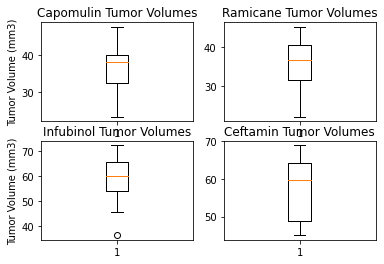

In [1367]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulinTumorVolumes = capomulin_df[0].tolist() #converting data frame values to lists
ramicaneTumorVolumes = ramicane_df[0].tolist()
infubinolTumorVolumes = infubinol_df[0].tolist()
ceftaminTumorVolumes = ceftamin_df[0].tolist()

fig1, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2) #creating a 2x2 grid of box plots for the drug regimens
#naming each axis of the box plot and giving each axis a list of values to correspond to the drug regimen tumor volumes
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_title('Capomulin Tumor Volumes')
ax1.boxplot(capomulinTumorVolumes)

ax2.set_title('Ramicane Tumor Volumes')
ax2.boxplot(ramicaneTumorVolumes)

ax3.set_ylabel('Tumor Volume (mm3)')
ax3.set_title('Infubinol Tumor Volumes')
ax3.boxplot(infubinolTumorVolumes)

ax4.set_title('Ceftamin Tumor Volumes')
ax4.boxplot(ceftaminTumorVolumes)

plt.show()

## Line and Scatter Plots

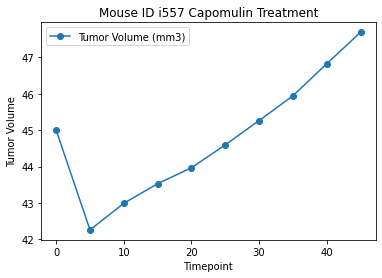

In [1368]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_ID_i557_df = combined_mouse_df[combined_mouse_df['Mouse ID'] == "i557"] #selecting a mouse to plot treatment results for

x_axis = mouse_ID_i557_df["Timepoint"]
y_axis = mouse_ID_i557_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker="o", label="Tumor Volume (mm3)")
plt.title("Mouse ID i557 Capomulin Treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.legend()
plt.show()

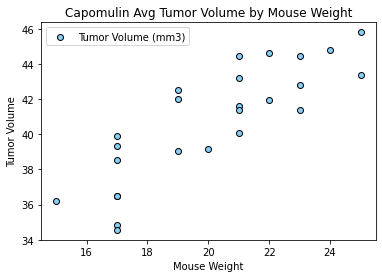

In [1369]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_df = combined_mouse_df[combined_mouse_df['Drug Regimen'] == "Capomulin"] #getting the mice only on the Capomulin drug regimen

average_capomulin_df = capomulin_mouse_df.groupby("Mouse ID").mean() #averaging the data values for each Mouse ID
x_axis = average_capomulin_df["Weight (g)"]
y_axis = average_capomulin_df["Tumor Volume (mm3)"]

plt.scatter(x_axis, y_axis, facecolors="lightskyblue", edgecolors="black", label="Tumor Volume (mm3)")
plt.title("Capomulin Avg Tumor Volume by Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.legend()
plt.show()

## Correlation and Regression

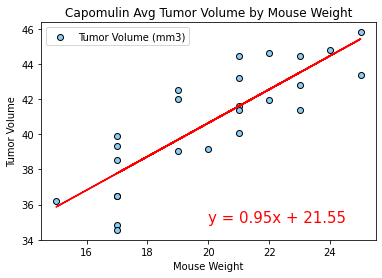

The correlation coefficient between both factors is 0.84


In [1370]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomulin_mouse_df = combined_mouse_df[combined_mouse_df['Drug Regimen'] == "Capomulin"] #getting the mice only on the Capomulin drug regimen

average_capomulin_df = capomulin_mouse_df.groupby("Mouse ID").mean() #averaging the data values for each Mouse ID
x_axis_values = average_capomulin_df["Weight (g)"]
y_axis_values = average_capomulin_df["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_values, y_axis_values) #extracting values for the linear regression model
regress_values = x_axis_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) #storing the line equation to allow for manual calculations using formula

plt.scatter(x_axis_values, y_axis_values, facecolors="lightskyblue", edgecolors="black", label="Tumor Volume (mm3)") #create the scatter plot
plt.plot(x_axis_values,regress_values,"r-") #plot the regression line on the chart
plt.annotate(line_eq,(20,35),fontsize=15,color="red") #add the formula the regression line is using to the chart at location (20,35) on the chart

plt.title("Capomulin Avg Tumor Volume by Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.legend()
plt.show()

correlation = st.pearsonr(x_axis_values, y_axis_values) #calculating correlation coefficient between the two data sets
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")